In [ ]:
pip uninstall keras-preprocessing

Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/Keras_Preprocessing-1.1.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/keras_preprocessing/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Preprocessing-1.1.2


In [ ]:
pip install git+https://github.com/keras-team/keras-preprocessing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-uqd8kpx7
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-uqd8kpx7
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43632 sha256=f81d51f91d316334477ebfd894b467c6869fd949ca678b082283cd3c1b713ded
  Stored in directory: /tmp/pip-ephem-wheel-cache-jitt9eja/wheels/bf/e1/57/66a055d3b2d9df6aa39d4c92ae343808dd60cbb39dfdf7218f
Successfully built Keras-Preprocessing


In [ ]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

traindf=pd.read_excel("Myfileslist (1).xlsx",dtype=str)

datagen=ImageDataGenerator(rescale=1./255.,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,validation_split=0.2)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/Ml_dataset/Mixed/",
x_col="filename",
y_col="Label_ghale",
subset="training",
batch_size=32,
class_mode="binary",
target_size=(64,64))

Found 165 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/Ml_dataset/Mixed/",
x_col="filename",
y_col="Label_ghale",
subset="validation",
batch_size=32,
class_mode="binary",
target_size=(64,64))
test_datagen=ImageDataGenerator(rescale=1./255.)

Found 41 validated image filenames belonging to 2 classes.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

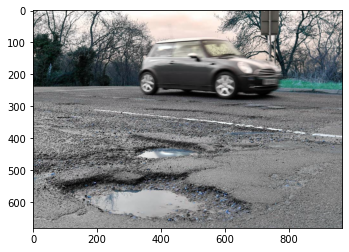

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Ml_dataset/Train/potholes/img (1).jpg"))

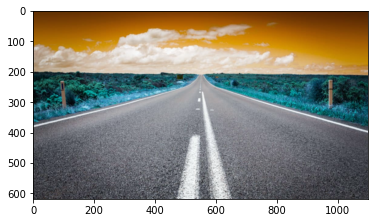

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Ml_dataset/Train/normal/img (100).jpg"))

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [ ]:
cnn.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=cnn.fit(x = train_generator, validation_data = valid_generator, epochs = 25)

Epoch 1/25
6/6 [==============================] - 101s 18s/step - loss: 0.7631 - accuracy: 0.4970 - val_loss: 0.8669 - val_accuracy: 0.0488
Epoch 2/25
6/6 [==============================] - 5s 947ms/step - loss: 0.6755 - accuracy: 0.5879 - val_loss: 0.8514 - val_accuracy: 0.0488
Epoch 3/25
6/6 [==============================] - 5s 1s/step - loss: 0.6409 - accuracy: 0.5939 - val_loss: 0.7289 - val_accuracy: 0.2195
Epoch 4/25
6/6 [==============================] - 5s 903ms/step - loss: 0.6105 - accuracy: 0.6727 - val_loss: 0.5432 - val_accuracy: 0.9024
Epoch 5/25
6/6 [==============================] - 5s 979ms/step - loss: 0.5458 - accuracy: 0.6545 - val_loss: 0.6977 - val_accuracy: 0.7805
Epoch 6/25
6/6 [==============================] - 6s 1s/step - loss: 0.4991 - accuracy: 0.7030 - val_loss: 0.6419 - val_accuracy: 0.7805
Epoch 7/25
6/6 [==============================] - 6s 913ms/step - loss: 0.4571 - accuracy: 0.7879 - val_loss: 0.4898 - val_accuracy: 0.7805
Epoch 8/25
6/6 [==========

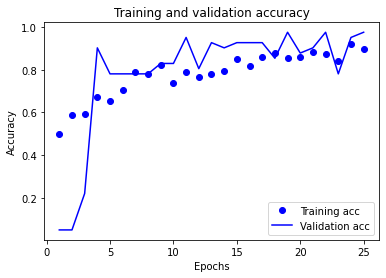

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history

acc = history_dict["accuracy"]
epochs = range(1, len(acc) + 1)
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

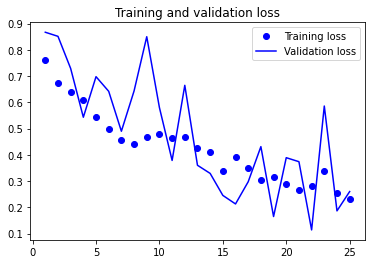

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Ml_dataset/test/35.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

1/1 [==============================] - 0s 133ms/step


In [ ]:
print(prediction)

pothole


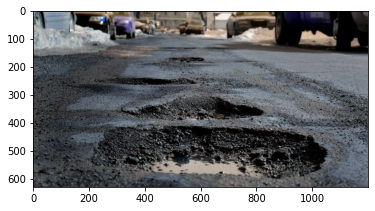

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Ml_dataset/test/35.jpg"))

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Ml_dataset/test/172.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

1/1 [==============================] - 0s 15ms/step


In [ ]:
print(prediction)

normal


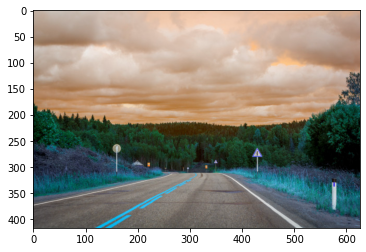

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Ml_dataset/test/172.jpg"))

**Inter Annotator Aggreement Value**

In [ ]:
def cohen_kappa(ann1, ann2):
    """Computes Cohen kappa for pair-wise annotators.
    :param ann1: annotations provided by first annotator
    :type ann1: list
    :param ann2: annotations provided by second annotator
    :type ann2: list
    :rtype: float
    :return: Cohen kappa statistic
    """
    count = 0
    for an1, an2 in zip(ann1, ann2):
        if an1 == an2:
            count += 1
    A = count / len(ann1)  # observed agreement A (Po)

    uniq = set(ann1 + ann2)
    E = 0  # expected agreement E (Pe)
    for item in uniq:
        cnt1 = ann1.count(item)
        cnt2 = ann2.count(item)
        count = ((cnt1 / len(ann1)) * (cnt2 / len(ann2)))
        E += count

    return round((A - E) / (1 - E), 4)

In [ ]:
df=pd.read_excel('Myfileslist (1).xlsx')

In [ ]:
ann1=[]
ann2=[]
for i,j in zip(df["Label_ghale"],df["Label_Ashtekar"]):
  ann1.append(i)
  ann2.append(j)

In [ ]:
val=cohen_kappa(ann1, ann2)
print("Inter Annotator Agreement Value:- ", val)

Inter Annotator Agreement Value:-  0.9611
